In [1]:
import pandas as pd
df = pd.read_excel('../data/raw/금융데이터셋(Kospi)__673(version 2).xls', index_col=0)
df.columns = df.iloc[0]
df = df[1:]
df

001402,한국가스공사,불량,7,174.1,141.75,357.12,101.176314,316.22,0.12676,114.71,...,0.630902,0.13,0.22,0.63,40389768736000,8835610495000,1120000000000.0,971340299000.0,982766312000,25481992525000
KIS,,,,,,,,,,,,,,,,,,,,,
001471,(주)케이티앤지,우량,2,278.38,216.20,26.33,155936.967988,0.09,0.000853,0.19,...,0.378787,14.38,35.01,17.58,7449227320000,5896480883000,5.030716e+09,7.934730e+08,1237317738000,2821671433000
004372,코스맥스비티아이(주),우량,4,61.96,61.96,16.70,1835.525488,10.91,0.052614,129.34,...,0.048194,1.54,29.98,1.71,299648956000,256775534000,1.351000e+10,3.273340e+08,6008299000,14441202000
005398,(주)인팩,우량,4,126.49,112.33,61.39,658.671013,19.91,0.199092,10.66,...,1.112389,4.95,4.26,7.80,127141955000,78777100000,1.568392e+10,2.181060e+08,1436601000,141431267000
006394,(주)에스제이엠홀딩스,우량,3,1525.64,1525.64,9.84,11373.454741,9.35,0.000000,48.80,...,0.087241,8.44,90.62,8.87,140922798000,128296558000,NaN,9.878600e+07,11235381000,12294306000
009288,(주)동아지질,우량,5,155.49,152.45,85.07,390.929140,28.70,0.251399,12.21,...,1.127875,1.88,1.56,3.29,259564348000,140253004000,3.525949e+10,9.358650e+08,3658569000,292756183000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L59549,해성디에스(주),우량,5,137.56,105.21,92.71,578.103443,51.00,0.195240,24.68,...,1.073571,6.59,5.97,13.20,229182084000,118925023000,2.321894e+10,3.251767e+09,18798577000,246043242000
L74201,두산밥캣(주),불량,7,19.45,19.45,5.41,-2325.815136,4.08,0.040762,470.53,...,0.004109,-0.16,-38.96,-0.17,2744539764000,2603777570000,1.061363e+11,3.658590e+08,-8509204000,11278327000
L92895,(주)서연이화,우량,4,92.99,90.94,124.87,1206.030957,41.65,0.336742,14.16,...,1.364416,6.75,4.71,15.42,777469769000,345745523000,1.164270e+11,3.955243e+09,47701455000,1060792487000


# 잡다한 캐시 메모리


```
--- 혼동 행렬 (Confusion Matrix) ---
[[51 10  0]
 [12 44  3]
 [ 0  6  9]]
```
```
!! 0: 최우량/우량 (저위험), 2: 불량/고위험 그룹 입니다.
              precision    recall  f1-score   support

       우량(0)       0.81      0.84      0.82        61
       보통(1)       0.73      0.75      0.74        59
       불량(2)       0.75      0.60      0.67        15

    accuracy                           0.77       135
   macro avg       0.76      0.73      0.74       135
weighted avg       0.77      0.77      0.77       135

```

```
보고서 내용엔 정해진 최종남은 변수(이전 보고서 내용중 인용)
이전 vif과정을 거쳐 선정된거임

6 3.816666 총자본순이익율/X13
5 3.308736 재고자산회전율/X10
4 2.683957 이자보상비율/X4
3 2.453982 순이익증가율/X9
2 2.357808 부채비율/X3
0 1.447969 단기차입금/총자본/X6
1 1.119535 매출액증가율/X8

최종 변수는 총 7개가 나왔으며 다음 다중 회귀분석을 거쳐 핵심변수를 뽑아낼 예정이다.
```

일일이 vif에서 영향을 받는 변수들을 선별후 최종변수와 vif값이 10이상 넘어가는 변수를 단계적으로 제거하여 만든 결과는 다르게 나옴.
```
[1-4] VIF 기반 다중공선성 검사 (Threshold=10.0)...
제거 후보: VIF 754.97로 높은 컬럼 '자본총계/X17'
제거 후보: VIF 177.59로 높은 컬럼 '차입금/자기자본/X5'
제거 후보: VIF 44.46로 높은 컬럼 '매출액/121000'
제거 후보: VIF 42.89로 높은 컬럼 '총자본순이익율/X13'
제거 후보: VIF 18.52로 높은 컬럼 '유동비율/X1'
제거 후보: VIF 10.57로 높은 컬럼 '자기자본순이익율/X15'
최종 1차 선정 변수 수: 15
```
따라서 이 6개의 vif계수가 높게 나온 변수를 제거하여 이후 OLR(순서형 로지스틱)을 돌려보았음.

```
▼ OrderedModel (순서형 로지스틱) 결과표
                             OrderedModel Results
==============================================================================
Dep. Variable:        KIS 신용평점/0A3010   Log-Likelihood:                -794.54
Model:                   OrderedModel   AIC:                             1619.
Method:            Maximum Likelihood   BIC:                             1683.
Date:                Fri, 28 Nov 2025
Time:                        07:13:22
No. Observations:                 537
Df Residuals:                     522
Df Model:                           6
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
부채비율/X3          1.7604      0.128     13.703      0.000       1.509       2.012
이자보상비율/X4       -0.2192      0.020    -11.020      0.000      -0.258      -0.180
단기차입금/총자본/X6     2.8448      0.472      6.033      0.000       1.921       3.769
매출액증가율/X8        0.0930      0.034      2.713      0.007       0.026       0.160
순이익증가율/X9       -0.1384      0.021     -6.660      0.000      -0.179      -0.098
재고자산회전율/X10      0.0049      0.062      0.078      0.938      -0.117       0.126
1/2             -1.5113      0.833     -1.813      0.070      -3.145       0.122
2/3              1.5846      0.156     10.135      0.000       1.278       1.891
3/4              0.4631      0.099      4.677      0.000       0.269       0.657
4/5              0.3236      0.097      3.321      0.001       0.133       0.515
5/6              0.4816      0.092      5.262      0.000       0.302       0.661
6/7              0.5678      0.099      5.735      0.000       0.374       0.762
7/8              0.6274      0.119      5.259      0.000       0.394       0.861
8/9              0.9616      0.146      6.574      0.000       0.675       1.248
9/10             0.9927      0.240      4.131      0.000       0.522       1.464
================================================================================
```

```

--- 최적 파라미터 및 성능 ---
최적의 파라미터: {'max_features': 0.25, 'n_estimators': 100}
최적 모델의 가중평균 Recall: 0.8138
모델 저장 완료: models/random_forest_final.pkl
```

```
--- XGBoost 특성 중요도 (Feature Importance) ---
최종 XGBoost 모델의 예측에 가장 큰 영향을 미친 변수 목록 (5개 변수 기반):
        Feature  Importance
0       부채비율/X3    0.414299
1     이자보상비율/X4    0.277398
4     순이익증가율/X9    0.118607
2  단기차입금/총자본/X6    0.115634
3     매출액증가율/X8    0.074063
```

여기에서 SMOTE를 사용하여 SMOTE 오버샘플링 적용 (XGBoost용 데이터 준비)

```
단계 5-A: SMOTE 오버샘플링 적용 (XGBoost용 데이터 준비)
=============================================
SMOTE 적용 전 학습 데이터 크기: 537개
SMOTE 적용 후 학습 데이터 크기: 726개
SMOTE 적용 후 그룹별 분포:
KIS 신용평점/0A3010
0    242
1    242
2    242
Name: count, dtype: int64

=============================================
단계 5: XGBoost 가중치 기반 훈련 (SMOTE 데이터 사용)
=============================================
[2-1] 모델 훈련 시작 (XGBoost, class_weight='balanced')
모델 훈련 완료.
[2-2] 모델 저장 완료: models/xgboost_smote_final.pkl

=============================================
단계 6: 최종 선정 XGBoost 모델 평가 및 특성 중요도 확인 (SMOTE)
=============================================

--- 최종 XGBoost (SMOTE+가중치, 5개 변수) 성능 평가 시작 ---

--- 혼동 행렬 (Confusion Matrix) ---
[[53  8  0]
 [12 41  6]
 [ 0  6  9]]

--- 등급별 상세 리포트 (Classification Report) ---
!! 0: 최우량/우량 (저위험), 2: 불량/고위험 그룹 입니다.
              precision    recall  f1-score   support

       우량(0)       0.82      0.87      0.84        61
       보통(1)       0.75      0.69      0.72        59
       불량(2)       0.60      0.60      0.60        15

    accuracy                           0.76       135
   macro avg       0.72      0.72      0.72       135
weighted avg       0.76      0.76      0.76       135


전체 정확도 (Accuracy): 0.7630

--- XGBoost 특성 중요도 (Feature Importance) ---
최종 XGBoost 모델의 예측에 가장 큰 영향을 미친 변수 목록:
        Feature  Importance
0       부채비율/X3    0.446007
1     이자보상비율/X4    0.241175
4     순이익증가율/X9    0.124482
2  단기차입금/총자본/X6    0.105734
3     매출액증가율/X8    0.082601

```


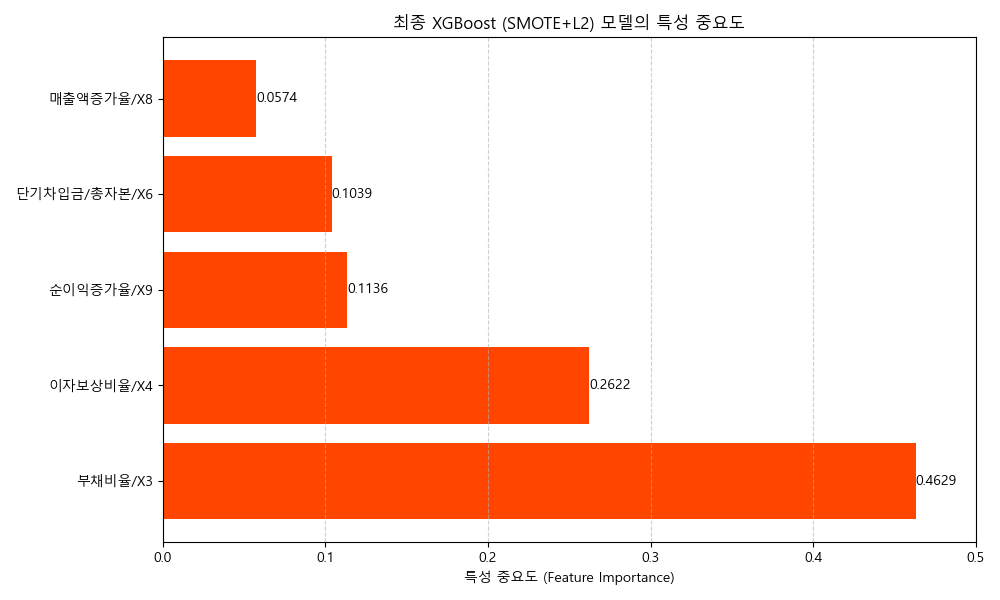